Inainte sa trimiti notebook-ul:

* asigura-te ca totul se executa cum trebuie. Prima oara, **restarteaza kernel-ul** (in meniu, selecteaza Kernel$\rightarrow$Restart & Run all);

* nu lasa niciun mesaj la output (`disp`, `printf`, linii care nu sunt incheiate cu `;`) in functiile pe care le scrii decat daca ti se specifica explicit sa faci acest lucru! Orice abatere va fi **depunctata automat** de grader;

* citeste instructiunile de [aici](https://github.com/radusqrt/numerical-methods/blob/master/lab_instructions.md) cu atentie;

* asigura-te ca rezolvi toate celulele in care scrie `YOUR CODE HERE` sau `YOUR ANSWER HERE` si ca iti treci numele mai jos:

In [1]:
STUDENT_NAME = "Babian Stelian Alexandru";

---

In [1]:
function [x] = SST (A,b)
  [n,n]=size(A);
  x=zeros(n,1);
  if A(n,n)~=0
    x(n)=b(n)/A(n,n);
  endif
  for i=(n-1):-1:1
    suma=A(i,(i+1):n)*x((i+1):n,1);
    x(i)=(b(i)-suma)/A(i,i);
  endfor
endfunction

# Laborator 9: Interpolari
### Autor: Radu Stochitoiu

## Problema 1

Implementati funcția ```vandermonde(x, y)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și returnează un vector coloană, $P$, ce reprezintă polinomul care trece prin toate punctele.

Primul element al lui $P$ reprezintă coeficientul celei mai mari puteri.

Ultimul element al lui $P$ reprezintă coeficientul celei mai mici puteri ($x^0$).

In [3]:
function [P] = vandermonde(x, y)
    [m,n]=size(x);
    A=zeros(n,n);
    P=zeros(n,1);
    aux=zeros(n,1);
    for i=1:n
        for j=1:n
            A(i,j)=x(i)^(j-1);
        endfor
    endfor
    Q=eye(n);
    R=A;
    for i=1:n
        x=A(:,i);
        x(1:i-1)=0;
        sigma=sign(x(i))*norm(x);
        x(i)=x(i)+sigma;
        H=eye(n);
        H=H-(2*x*x')/(x'*x);
        
        A=H*A;
        Q=Q*H;
    endfor
    R=A;
    R(abs(R(1:n,1:n))<=1e-12)=0;
    aux=SST(R,Q'*y');
    for i=1:n
        P(i)=aux(n-i+1);
    endfor
endfunction

In [ ]:
x=[0]

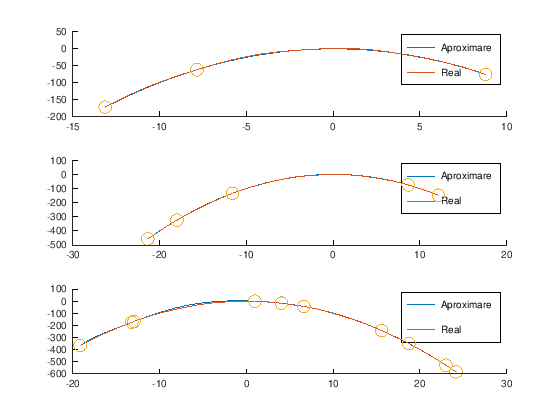

In [4]:
function [y] = f(x)
    y = sin(x) - x.^2;
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 50);
y = f(x);
P = vandermonde(x, y);

subplot(3, 1, 1);
hold
xx = linspace(min(x), max(x));
yy = polyval(P, xx);
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(polyval(P, x(i)) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 5) - 0.5) * 50);
y = f(x);
P = vandermonde(x, y);

subplot(3, 1, 2);
hold
xx = linspace(min(x), max(x));
yy = polyval(P, xx);
plot(xx, yy)
plot(xx, f(xx))
hold on
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(polyval(P, x(i)) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 10) - 0.5) * 50);
y = f(x);
P = vandermonde(x, y);

subplot(3, 1, 3);
hold
xx = linspace(min(x), max(x));
yy = polyval(P, xx);
plot(xx, yy)
plot(xx, f(xx))
hold on
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(polyval(P, x(i)) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 2

Implementati funcția ```lagrange(x, y, xx)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și un vector linie $xx$ pentru care vrem să găsim valorile aproximate și returnează un vector linie, $yy$, ce reprezintă valorile interpolării Lagrange cu suportul $x, y$ prin toate punctele $xx$.

In [1]:
function [rez]=L(z,i,x)
    rez=1;
    [m,n]=size(x);
    for j=1:n
        if (j~=i)
            rez=rez*(z-x(j))/(x(i)-x(j));
        endif
    endfor
endfunction
function [yy] = lagrange(x, y, xx)
    [m,n]=size(x);
    [mxx,nxx]=size(xx);
    yy=zeros(1,nxx);
    P=zeros(n,1);
    for i=1:n
        for k=1:nxx
            rez=L(xx(k),i,x);
            yy(k)=yy(k)+y(i)*rez;
        endfor
    endfor
endfunction

In [2]:
x=[0 1 2]
y=[1 3 3]
xx=[1.5]
yy=lagrange(x,y,xx)

x =

   0   1   2

y =

   1   3   3

xx =  1.5000
yy =  3.2500


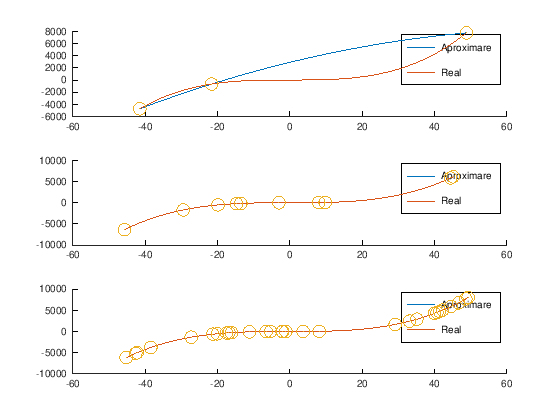

In [6]:
function [y] = f(x)
    y = x.^3 / 15 - 3;
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
yy = lagrange(x, y, xx);
yy_test = lagrange(x, y, x);

subplot(3, 1, 1);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 10) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
yy = lagrange(x, y, xx);
yy_test = lagrange(x, y, x);

subplot(3, 1, 2);
hold
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 30) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
yy = lagrange(x, y, xx);
yy_test = lagrange(x, y, x);

subplot(3, 1, 3);
hold
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 3

Implementati funcția ```newton(x, y)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și returnează un vector linie, $P$, ce reprezintă coeficienții interpolării prin diferențe divizate ($b_0, b_1, ...$).

Primul element al lui $P$ reprezintă coeficientul celei mai mari puteri.

Ultimul element al lui $P$ reprezintă coeficientul celei mai mici puteri.

In [21]:
% Functie care calculeaza recursiv coeficientul f[x_start, ..., x_stop]
% Nu e obligatoriu sa o implementati

function [P] = newton(x, y)
    [m,n]=size(x);
    P=zeros(1,n);
    Paux=zeros(1,n);
    for i=1:n
        suma=0;
        for j=1:i
            numar=y(j);
            produs=1;
            for k=1:i
                if(k~=j)
                    produs=produs*(x(j)-x(k));
                endif
            endfor
            numar=numar/produs;
            suma=suma+numar;
        endfor
        Paux(i)=suma;
    endfor

    for i=1:n
        P(i)=Paux(n-i+1);
    endfor
endfunction

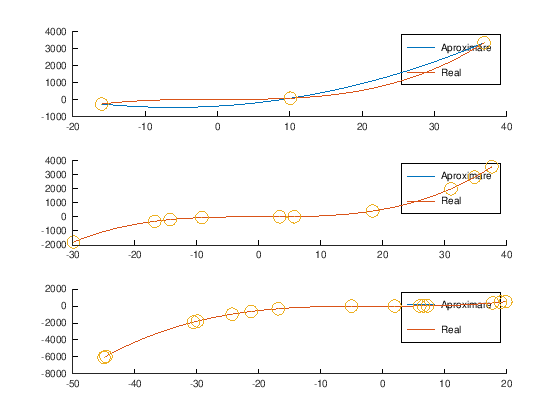

In [22]:
function [y] = newton_eval(P, xx, x)
    y = 0;
    p = 1;
    for i = 1:length(P)
        y += p .* P(length(P) - i + 1);
        p = p .* (x - xx(i));
    endfor
endfunction

function [y] = f(x)
    y = x.^3 / 15 - 3;
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
P = newton(x, y);
yy = newton_eval(P, x, xx);
yy_test = newton_eval(P, x, x);

subplot(3, 1, 1);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 10) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
P = newton(x, y);
yy = newton_eval(P, x, xx);
yy_test = newton_eval(P, x, x);

subplot(3, 1, 2);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 15) - 0.5) * 100);
y = f(x);
xx = linspace(min(x), max(x));
P = newton(x, y);
yy = newton_eval(P, x, xx);
yy_test = newton_eval(P, x, x);

subplot(3, 1, 3);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 4

Implementati funcția ```neville(x, y, xx)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și un vector linie $xx$ pentru care vrem să găsim valorile aproximate și returnează un vector linie, $yy$, ce reprezintă valorile interpolării Neville cu suportul $x, y$ prin toate punctele $xx$.

In [23]:
% Functie care calculeaza recursiv P_ij(to_eval) pentru suportul [x, y]
% Nu e obligatoriu sa o implementati

function [yy] = neville(x, y, xx)
    [m,n]=size(x);
    [mxx,nxx]=size(xx);
    yy=zeros(1,nxx);
    for i=1:nxx
        P=zeros(n,n);
        for z=1:n
            P(z,z)=y(z);
        endfor
        for z=2:n
            for j=z:n
                k=j-z+1;
                element=0;
                element=(xx(i)-x(j))*P(k,j-1)+(x(k)-xx(i))*P(k+1,j);
                P(k,j)=element/(x(k)-x(j));
            endfor
        endfor
        yy(i)=P(1,n);
    endfor
endfunction

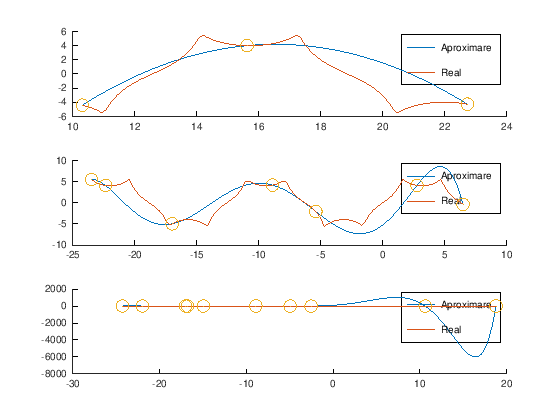

In [25]:
function [y] = f(x)
    y = 8 * sin(x / 2) ./ (abs(cos(x)) + 1);
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 50);
y = f(x);
xx = linspace(min(x), max(x));
yy = neville(x, y, xx);
yy_test = neville(x, y, x);

subplot(3, 1, 1);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 7) - 0.5) * 50);
y = f(x);
xx = linspace(min(x), max(x));
yy = neville(x, y, xx);
yy_test = neville(x, y, x);

subplot(3, 1, 2);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 10) - 0.5) * 50);
y = f(x);
xx = linspace(min(x), max(x));
yy = neville(x, y, xx);
yy_test = neville(x, y, x);

subplot(3, 1, 3);
hold;
plot(xx, yy)
plot(xx, f(xx))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x)
    assert(norm(yy_test(i) - y(i)) < 1e-4);
endfor
legend("Aproximare", "Real")

## Problema 5

Implementati funcția ```spline_c2_natural(x, y)``` ce primește doi vectori linie, $x, y$, reprezentând coordonatele pe axele OX și OY ale unor puncte ce definesc suportul interpolării și returnează o matrice $S$ ce are pe linia i coeficienții $a_{i-1}, b_{i-1}, c_{i-1}, d_{i-1}$.

In [2]:
function [S] = spline_c2_natural(x, y)
    n = length(x)-1;
    A = zeros(4*n);
    b = zeros(4*n, 1);
    j=1;
    % primele n+1 ecuatii
    for i = 1:4:4*n
        A(j, i) = 1;
        b(j) = y(j);
        j++;
    endfor
    
    A(j, [4*n-3:4*n]) = [(x(n+1)-x(n)).^([0:2+1])];
    b(j) = y(j);
    j++;
    
    % pana aici
    
    % urmatoarele n-1 ecuatii
    
    for i = 0:n-2
    
        A(j, [4*i+1:4*(i+1)]) = (x(i+2)-x(i+1)).^([0:3]);
        A(j, 4*(i+1)+1) = -1;
    
        j++;
    endfor   
    % pana aici
    
    % urmatoarele n-1 ecuatii
    
    for i = 0:n-2
    
        A(j, [4*i+2:4*(i+1)]) = (x(i+2)-x(i+1)).^[0:2].*[1:3];
        A(j, 4*(i+1)+2) = -1;
        
        j++;
    
    endfor
    
    % pana aici

    % urmatoarele n-1 ecuatii
    
    for i = 0:n-2
    
        A(j, [4*i+3:4*(i+1)]) = (x(i+2)-x(i+1)).^[0:1].*[2, 6];
        A(j, 4*(i+1)+3) = -2;
        
        j++;
    
    endfor    
    
    % pana aici

    % ultimele 2 ecuatii pentru spline natural

        A(j, 3) = 1;
        
        j++;
        
        A(j, [4*(n-1)+3, 4*(n-1)+4]) = [2, 6*(x(n+1)- x(n))];

    x = inv(A)*b;
    S = reshape(x, 4, n)';
endfunction

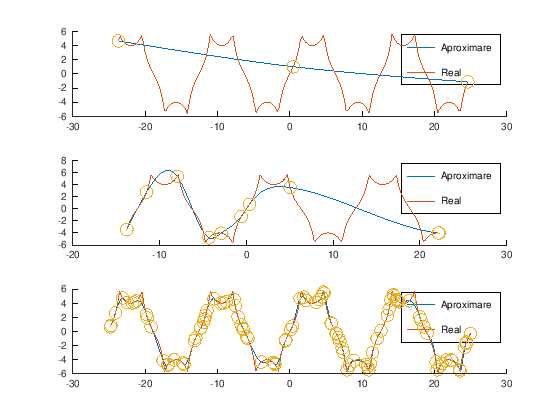

In [3]:
function [XX, YY] = spline_eval(S, x, y)
    XX = [];
    YY = [];
    n = length(x) - 1;
    for i = 1:n
        s = S(i, :);
        xx = linspace(x(i), x(i + 1));
        yy = s(1);
        yy += s(2) * (xx - repmat(x(i), 1, 100));
        yy += s(3) * (xx - repmat(x(i), 1, 100)) .^ 2;
        yy += s(4) * (xx - repmat(x(i), 1, 100)) .^ 3;
        XX = [XX, xx];
        YY = [YY, yy];
    endfor
endfunction

function [y] = f(x)
    y = 8 * sin(x / 2) ./ (abs(cos(x)) + 1);
endfunction

% Test 1
x = sort((rand(1, 3) - 0.5) * 50);
y = f(x);

xx = linspace(min(x), max(x));
S = spline_c2_natural(x, y);
[XX, YY] = spline_eval(S, x, y);

subplot(3, 1, 1);
hold;
plot(XX, YY)
plot(XX, f(XX))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x) - 1
    assert(norm(YY(100 * (i - 1) + 1) - y(i)) < 1e-4);
endfor
assert(norm(YY(end) - y(end)) < 1e-4);
legend("Aproximare", "Real")

% Test 2
x = sort((rand(1, 10) - 0.5) * 50);
y = f(x);

xx = linspace(min(x), max(x));
S = spline_c2_natural(x, y);
[XX, YY] = spline_eval(S, x, y);

subplot(3, 1, 2);
hold;
plot(XX, YY)
plot(XX, f(XX))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x) - 1
    assert(norm(YY(100 * (i - 1) + 1) - y(i)) < 1e-4);
endfor
assert(norm(YY(end) - y(end)) < 1e-4);
legend("Aproximare", "Real")

% Test 3
x = sort((rand(1, 100) - 0.5) * 50);
y = f(x);

xx = linspace(min(x), max(x));
S = spline_c2_natural(x, y);
[XX, YY] = spline_eval(S, x, y);

subplot(3, 1, 3);
hold;
plot(XX, YY)
plot(XX, f(XX))
plot(x, y, 'o', 'markersize', 12)
for i = 1:length(x) - 1
    assert(norm(YY(100 * (i - 1) + 1) - y(i)) < 1e-4);
endfor
assert(norm(YY(end) - y(end)) < 1e-4);
legend("Aproximare", "Real")